In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.preprocessing import image
import time
import pickle
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt',delimiter='\t',header=None) 


In [ ]:
print(dataset.shape)

(40460, 2)


In [ ]:
dataset.head()

,0,1
0,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg#3,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg#4,A little girl in a pink dress going into a woo...


In [ ]:
print(dataset[0][3])
print(dataset[1][3])

1000268201_693b08cb0e.jpg#3
A little girl climbing the stairs to her playhouse .


# Data Cleaning

In [ ]:
import re
import nltk
corpus = []
for i in range(0, dataset.shape[0]):
    cap = re.sub('[^a-zA-Z]', ' ', dataset[1][i])  #Removed all other characters except alphabets
    cap = cap.lower()                              #Converted to lower case
    cap = cap.split()                               
    cap=[word for word in cap if len(word)>1]      #Removed single letter words
    cap = ' '.join(cap)                            # Joined with spaces
    cap= '<startseq> '+cap+' <endseq>'
    corpus.append(cap)                             #list of captions

In [ ]:
for i in range(50): print(corpus[i:i+1])
print(len(corpus))

['<startseq> child in pink dress is climbing up set of stairs in an entry way <endseq>']
['<startseq> girl going into wooden building <endseq>']
['<startseq> little girl climbing into wooden playhouse <endseq>']
['<startseq> little girl climbing the stairs to her playhouse <endseq>']
['<startseq> little girl in pink dress going into wooden cabin <endseq>']
['<startseq> black dog and spotted dog are fighting <endseq>']
['<startseq> black dog and tri colored dog playing with each other on the road <endseq>']
['<startseq> black dog and white dog with brown spots are staring at each other in the street <endseq>']
['<startseq> two dogs of different breeds looking at each other on the road <endseq>']
['<startseq> two dogs on pavement moving toward each other <endseq>']
['<startseq> little girl covered in paint sits in front of painted rainbow with her hands in bowl <endseq>']
['<startseq> little girl is sitting in front of large painted rainbow <endseq>']
['<startseq> small girl in the grass

In [ ]:
i=0
while i < dataset.shape[0]:
  dataset[0][i]=dataset[0][i].split('.')[0]        #Removed characters after '.'
  i=i+1

In [ ]:
print(dataset.head)

<bound method NDFrame.head of                            0                                                  1
0      1000268201_693b08cb0e  A child in a pink dress is climbing up a set o...
1      1000268201_693b08cb0e              A girl going into a wooden building .
2      1000268201_693b08cb0e   A little girl climbing into a wooden playhouse .
3      1000268201_693b08cb0e  A little girl climbing the stairs to her playh...
4      1000268201_693b08cb0e  A little girl in a pink dress going into a woo...
...                      ...                                                ...
40455   997722733_0cb5439472           A man in a pink shirt climbs a rock face
40456   997722733_0cb5439472           A man is rock climbing high in the air .
40457   997722733_0cb5439472  A person in a red shirt climbing up a rock fac...
40458   997722733_0cb5439472                    A rock climber in a red shirt .
40459   997722733_0cb5439472  A rock climber practices on a rock climbing wa...

[40460 ro

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
from collections import defaultdict
new_dict= defaultdict(lambda : [])          #Created a dictionary with image ids as key and captions as value
i=0
while i <len(corpus):
  # print(dataset[0][i])
  new_dict[dataset[0][i]].append(corpus[i])
  i=i+1                                                     

In [ ]:
print(len(new_dict))

8092


In [ ]:
print(new_dict['2513260012_03d33305cf'])

['<startseq> black dog is running after white dog in the snow <endseq>', '<startseq> black dog chasing brown dog through snow <endseq>', '<startseq> two dogs chase each other across the snowy ground <endseq>', '<startseq> two dogs play together in the snow <endseq>', '<startseq> two dogs running through low lying body of water <endseq>']


In [ ]:
all_vocab = []              #A list of all the words in the captions

for key in new_dict.keys():
    [ all_vocab.append(i) for des in new_dict[key] for i in des.split()]

In [ ]:
print("total words appearing : " , len(all_vocab))

total words appearing :  454757


In [ ]:
from collections import Counter

counter = Counter(all_vocab)

In [ ]:
dic_ = dict(counter)

In [ ]:
sorted_dic = sorted(dic_.items(), key = lambda x: x[1], reverse=True)   #List with words and their corresponding frequency

In [ ]:
print(len(sorted_dic))

8426


In [ ]:
for i in range(100):
  print(sorted_dic[i])

('<startseq>', 40460)
('<endseq>', 40460)
('in', 18987)
('the', 18420)
('on', 10746)
('is', 9345)
('and', 8863)
('dog', 8138)
('with', 7765)
('man', 7275)
('of', 6723)
('two', 5643)
('white', 3959)
('black', 3848)
('boy', 3581)
('are', 3505)
('woman', 3403)
('girl', 3328)
('to', 3176)
('wearing', 3062)
('at', 2916)
('people', 2887)
('water', 2790)
('red', 2691)
('young', 2630)
('brown', 2578)
('an', 2432)
('his', 2357)
('blue', 2279)
('dogs', 2125)
('running', 2073)
('through', 2032)
('playing', 2008)
('while', 1968)
('shirt', 1962)
('down', 1843)
('standing', 1789)
('ball', 1783)
('little', 1768)
('grass', 1622)
('snow', 1547)
('child', 1545)
('person', 1542)
('jumping', 1473)
('over', 1415)
('three', 1389)
('front', 1386)
('sitting', 1368)
('holding', 1324)
('up', 1302)
('field', 1283)
('small', 1278)
('by', 1249)
('large', 1237)
('green', 1234)
('one', 1223)
('group', 1218)
('yellow', 1217)
('her', 1178)
('walking', 1165)
('children', 1156)
('men', 1121)
('into', 1074)
('air', 1062)

In [ ]:
threshold_value = 10

d = [(x) for x in sorted_dic if x[1]>threshold_value]

In [ ]:
len(d)

1847

In [ ]:
all_vocab = [x[0] for x in d]                       #Updating all_vocab

In [ ]:
len(all_vocab)

1847

In [ ]:
f = open('new_dict.txt', 'w')
f.write(str(new_dict))
f.close()

## **Load Training and Testing Data**

In [ ]:
with open('/content/drive/My Drive/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt') as f:
  train=f.read()

In [ ]:
train = [e[:-4] for e in train.split('\n')[:-1]]                                #train image ids

In [ ]:
for i in range(len(train)):
  if i>10:
    break
  print(train[i])

2513260012_03d33305cf
2903617548_d3e38d7f88
3338291921_fe7ae0c8f8
488416045_1c6d903fe0
2644326817_8f45080b87
218342358_1755a9cce1
2501968935_02f2cd8079
2699342860_5288e203ea
2638369467_8fc251595b
2926786902_815a99a154
2851304910_b5721199bc


In [ ]:
with open('/content/drive/My Drive/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt')as f:
  test=f.read()

In [ ]:
test = [e[:-4] for e in test.split('\n')[:-1]]                                    #test image ids

In [ ]:
for i in range(len(test)):
  if i>10:
    break
  print(test[i])

3385593926_d3e9c21170
2677656448_6b7e7702af
311146855_0b65fdb169
1258913059_07c613f7ff
241347760_d44c8d3a01
2654514044_a70a6e2c21
2339106348_2df90aa6a9
256085101_2c2617c5d0
280706862_14c30d734a
3072172967_630e9c69d0
3482062809_3b694322c4


In [ ]:
train_descriptions = {}                                                           #dictionary with keys as image ids and values as corresponding captions
for t in train:
    train_descriptions[t] = []
    for cap in new_dict[t]:
        train_descriptions[t].append(cap)

In [ ]:
print(train_descriptions['2903617548_d3e38d7f88'][0])

<startseq> little baby plays croquet <endseq>


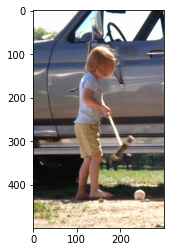

<startseq> little baby plays croquet <endseq>
<startseq> little girl plays croquet next to truck <endseq>
<startseq> the child is playing croquette by the truck <endseq>
<startseq> the kid is in front of car with put and ball <endseq>
<startseq> the little boy is playing with croquet hammer and ball beside the car <endseq>


In [ ]:
img_id='2903617548_d3e38d7f88.jpg'
path = images + img_id
img = plt.imread(path)
plt.imshow(img)
plt.show()
for i in range(5):
  print(train_descriptions['2903617548_d3e38d7f88'][i])

In [ ]:
i=0
for keys,values in train_descriptions.items():
 i=i+1
 
 print(keys)
 print(values)
 if i>20:break

2513260012_03d33305cf
['<startseq> black dog is running after white dog in the snow <endseq>', '<startseq> black dog chasing brown dog through snow <endseq>', '<startseq> two dogs chase each other across the snowy ground <endseq>', '<startseq> two dogs play together in the snow <endseq>', '<startseq> two dogs running through low lying body of water <endseq>']
2903617548_d3e38d7f88
['<startseq> little baby plays croquet <endseq>', '<startseq> little girl plays croquet next to truck <endseq>', '<startseq> the child is playing croquette by the truck <endseq>', '<startseq> the kid is in front of car with put and ball <endseq>', '<startseq> the little boy is playing with croquet hammer and ball beside the car <endseq>']
3338291921_fe7ae0c8f8
['<startseq> brown dog in the snow has something hot pink in its mouth <endseq>', '<startseq> brown dog in the snow holding pink hat <endseq>', '<startseq> brown dog is holding pink shirt in the snow <endseq>', '<startseq> dog is carrying something pink

# Data Preprocessing- Images

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
model = ResNet50(weights = 'imagenet', input_shape = (224,224,3))

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
model_new = Model(inputs = model.input, outputs =  model.layers[-2].output)

In [ ]:
def preprocess_image(img):
    img = image.load_img(img, target_size=(224,224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis = 0)

    return img


In [ ]:
def encode_image(img):
    img = preprocess_image(img)
    fea_vec = model_new.predict(img)
    fea_vec = fea_vec.reshape(fea_vec.shape[1], )
    return fea_vec

In [ ]:
images='/content/drive/My Drive/Flickr_Data/Flickr_Data/Images/'

In [ ]:
start = time.time()

encoding_train = {}                #Dictionary with keys as image ids and values as encoding corresponding to the images                        

for ix, img in enumerate(train):
    
    img = images+train[ix]+".jpg"
    
    p = encode_image(img)
    
    encoding_train[ img[len(images):] ] = p
    
    
    if ix%100 == 0:
        print("Encoding image :" + str(ix))
    
print("Time taken in sec - " + time.time() - start)

Encoding image :0
Encoding image :100
Encoding image :200
Encoding image :300
Encoding image :400
Encoding image :500
Encoding image :600
Encoding image :700
Encoding image :800
Encoding image :900
Encoding image :1000
Encoding image :1100
Encoding image :1200
Encoding image :1300
Encoding image :1400
Encoding image :1500
Encoding image :1600
Encoding image :1700
Encoding image :1800
Encoding image :1900
Encoding image :2000
Encoding image :2100
Encoding image :2200
Encoding image :2300
Encoding image :2400
Encoding image :2500
Encoding image :2600
Encoding image :2700
Encoding image :2800
Encoding image :2900
Encoding image :3000
Encoding image :3100
Encoding image :3200
Encoding image :3300
Encoding image :3400
Encoding image :3500
Encoding image :3600
Encoding image :3700
Encoding image :3800
Encoding image :3900
Encoding image :4000
Encoding image :4100
Encoding image :4200
Encoding image :4300
Encoding image :4400
Encoding image :4500
Encoding image :4600
Encoding image :4700
Enco

TypeError: ignored

In [ ]:
start = time.time()

encoding_test = {}

for ix, img in enumerate(test):
    
    img = images+test[ix]+".jpg"
    
    p = encode_image(img)
    
    encoding_test[ img[len(images):] ] = p
    
    
    if ix%100 == 0:
        print("Encoding image :" + str(ix))
    
print("Time taken in sec - " + time.time() - start)

In [ ]:
# saving features to disk

with open("./encoded_train_images.pkl", 'wb') as f:
    pickle.dump(encoding_train, f )

In [ ]:
with open("./encoded_test_images.pkl", 'wb') as f:
    pickle.dump(encoding_test, f )

In [ ]:
with open("/content/drive/My Drive/Flickr_Data/encoded_train_images.pkl", 'rb') as f:
    encoding_train = pickle.load(f)

In [ ]:
with open("/content/drive/My Drive/Flickr_Data/encoded_test_images.pkl", 'rb') as f:
    encoding_test = pickle.load(f)

# Data Preprocessing - Captions

In [ ]:
word_to_idx = {}
idx_to_word = {}

ix = 1

for e in all_vocab:
    #print(ix,e)
    word_to_idx[e] = ix
    idx_to_word[ix] = e
    ix +=1

In [ ]:
i=0
for keys,values in word_to_idx.items():
 i=i+1
 
 print(keys,values)
 
 if i>20:break

<startseq> 1
<endseq> 2
in 3
the 4
on 5
is 6
and 7
dog 8
with 9
man 10
of 11
two 12
white 13
black 14
boy 15
are 16
woman 17
girl 18
to 19
wearing 20
at 21


In [ ]:
i=0
for keys,values in idx_to_word.items():
 i=i+1
 
 print(keys,values)
 
 if i>20:break

1 <startseq>
2 <endseq>
3 in
4 the
5 on
6 is
7 and
8 dog
9 with
10 man
11 of
12 two
13 white
14 black
15 boy
16 are
17 woman
18 girl
19 to
20 wearing
21 at


In [ ]:
for i in range(21):print(all_vocab[i])

<startseq>
<endseq>
in
the
on
is
and
dog
with
man
of
two
white
black
boy
are
woman
girl
to
wearing
at


In [ ]:
len(all_vocab)

1847

In [ ]:
vocab_size = len(idx_to_word) + 1
print(vocab_size)

1848


In [ ]:
all_caption_len = []

for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        all_caption_len.append(len(cap.split()))

In [ ]:
print(len(all_caption_len))
print(all_caption_len[:50])

30000
[12, 9, 11, 9, 11, 6, 9, 10, 13, 15, 14, 10, 11, 15, 12, 8, 11, 10, 8, 14, 13, 8, 10, 6, 11, 11, 13, 11, 18, 14, 16, 12, 14, 15, 17, 10, 7, 7, 15, 15, 6, 16, 10, 13, 8, 11, 13, 18, 11, 18]


In [ ]:
max_len = max(all_caption_len)
print(max_len) 

35


# Generator Function

In [ ]:
def data_generator(train_descriptions, encoding_train, word_to_idx, max_len,  num_photos_per_batch ):
    X1, X2, y = [], [], []
    
    n=0
    cnt = 0
    all_items = list(train_descriptions.keys())
    
    while True:
      n+=1
      # print(cnt)
      key = all_items[cnt]
      desc_list = train_descriptions[key]              
      cnt+=1
      cnt= (cnt%len(all_items))


      photo = encoding_train[key+'.jpg']          #feature vector
            #print(photo.shape)
      for desc in desc_list:                       #desc : iterates through the 5 captions
        seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]                
                
        for i in range(1, len(seq)): 
            in_seq = seq[0:i]
            out_seq = seq[i]
            
            in_seq = pad_sequences( [in_seq], maxlen=max_len, value= 0, padding='post')[0]
        
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            
            X1.append(photo)
            X2.append(in_seq)
            y.append(out_seq)

      if n == num_photos_per_batch:
          yield [np.array(X1), np.array(X2)] , np.array(y)
          X1, X2, y = [], [], []
          n = 0         

In [ ]:
for i in data_generator(train_descriptions, encoding_train, word_to_idx, max_len, 3):
    X, y = i
    print(X[0].shape) 
    print(X[1].shape)
    print(y.shape)
    break

(147, 2048)
(147, 35)
(147, 1848)


## **Word Embedding**

In [ ]:
embeddings = {}

with open('/content/drive/My Drive/Flickr_Data/Flickr_Data/glove.6B.50d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.array(values[1:], dtype="float32")
        
        embeddings[word] = coeffs


In [ ]:
i=0
for keys,values in embeddings.items():
 i=i+1
 
 print(keys,values)
 
 if i>10:break

the [ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]
, [ 0.013441  0.23682  -0.16899   0.40951   0.63812   0.47709  -0.42852
 -0.55641  -0.364    -0.23938   0.13001  -0.063734 -0.39575  -0.48162
  0.23291   0.090201 -0.13324   0.078639 -0.41634  -0.15428   0.10068
  0.48891   0.31226  -0.1252   -0.037512 -1.5179    0.12612  -0.02442
 -0.042961 -0.28351   3.5416   -0.11956  -0.014533 -0.1499    0.21864
 -0.33412  -0.13872   0.31806   0.

In [ ]:
print(len(embeddings))

400000


In [ ]:
def getOutputEmbeddings():

    emb_dim = 50
    embedding_matrix_output = np.zeros((vocab_size, emb_dim ))
    
    for word, idx in word_to_idx.items():
        
        emb_vec = embeddings.get(word)
        
        if emb_vec is not None:
            embedding_matrix_output[idx] = emb_vec
            
    return embedding_matrix_output

In [ ]:
embedding_output = getOutputEmbeddings()

In [ ]:
embedding_output.shape

(1848, 50)

In [ ]:
print(embedding_output[3:5])

[[ 3.30419987e-01  2.49950007e-01 -6.08739972e-01  1.09229997e-01
   3.63719985e-02  1.50999993e-01 -5.50830007e-01 -7.42390007e-02
  -9.23070014e-02 -3.28209996e-01  9.59800035e-02 -8.22690010e-01
  -3.67170006e-01 -6.70090020e-01  4.29089993e-01  1.64960008e-02
  -2.35730007e-01  1.28639996e-01 -1.09529996e+00  4.33340013e-01
   5.70670009e-01 -1.03600003e-01  2.04219997e-01  7.83080012e-02
  -4.27949995e-01 -1.79840004e+00 -2.78649986e-01  1.19539998e-01
  -1.26890004e-01  3.17439996e-02  3.86310005e+00 -1.77860007e-01
  -8.24339986e-02 -6.26980007e-01  2.64970005e-01 -5.71850017e-02
  -7.35210031e-02  4.61030006e-01  3.08620006e-01  1.24980003e-01
  -4.86090004e-01 -8.02719966e-03  3.11840009e-02 -3.65759999e-01
  -4.26990002e-01  4.21640009e-01 -1.16659999e-01 -5.07030010e-01
  -2.72729993e-02 -5.32850027e-01]
 [ 4.18000013e-01  2.49679998e-01 -4.12420005e-01  1.21699996e-01
   3.45270008e-01 -4.44569997e-02 -4.96879995e-01 -1.78619996e-01
  -6.60229998e-04 -6.56599998e-01  2.7843

#**Model** Architecture

In [ ]:
input_img_fea = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_fea)
inp_img2 = Dense(256, activation='relu')(inp_img1)

In [ ]:
print(inp_img2.shape)

(None, 256)


In [ ]:
input_cap = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim= vocab_size, output_dim=50, mask_zero=True)(input_cap)
#print(inp_cap1)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [ ]:
print(inp_cap3.shape)

(None, 256)


In [ ]:
decoder1 = add([inp_img2, inp_cap3])
print(decoder1.shape)
decoder2 = Dense(256, activation='relu')(decoder1)
output = Dense(vocab_size, activation='softmax')(decoder2)


model = Model(inputs = [input_img_fea, input_cap]  , outputs =  output )

(None, 256)


In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 50)       92400       input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
model.layers[2].set_weights([embedding_output])
model.layers[2].trainable = False

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam') 

In [ ]:
epochs = 10
number_photos_per_batch = 3
steps = len(train_descriptions)//number_photos_per_batch

mytraingen = data_generator(train_descriptions, encoding_train, word_to_idx, max_len, number_photos_per_batch)

model.fit(mytraingen,steps_per_epoch=steps,epochs = epochs,verbose=1)


In [ ]:
model.save("best_model6.h5") 

In [ ]:
model.save_weights("/content/drive/My Drive/Weights/weights.h5") 

In [ ]:
model=load_model('/content/drive/My Drive/best_model6.h5')

# Predictions

In [ ]:
def predict(photo_enc,model):
    in_text = "<startseq>"
    
    for i in range(max_len):
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        #print(sequence)
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')
        
        y_pred = model.predict([photo_enc, sequence])
        y_pred = np.argmax(y_pred)
        word = idx_to_word[y_pred]
        
        in_text += " "+word
        
        if word == '<endseq>':
            break
        
        
    final_caption = in_text.split()
    final_caption = final_caption[1:-1]
    final_caption = " ".join(final_caption)
    return final_caption

## **Some Random Predictions**

two dogs are running through the snow


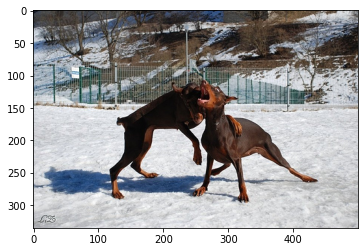

In [ ]:
img_id = list(encoding_test.keys())[0]

photo_enc = encoding_test[img_id].reshape((1,2048))
pred = predict(photo_enc,model)

print(pred)

path = images + img_id
img = plt.imread(path)
plt.imshow(img)
plt.show()

basketball player in white is being by the player in white for the ball


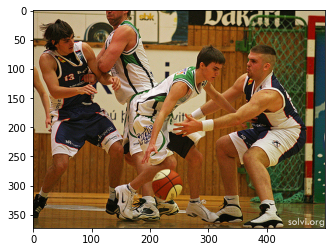

In [ ]:
img_id = list(encoding_test.keys())[9]

photo_enc = encoding_test[img_id].reshape((1,2048))
pred = predict(photo_enc,model)

print(pred)

path = images + img_id
img = plt.imread(path)
plt.imshow(img)
plt.show()

two dogs are running through field


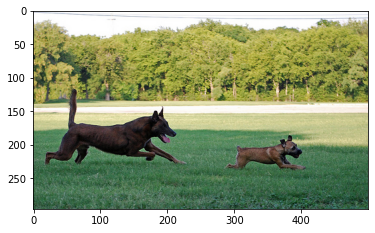

In [ ]:
img_id = list(encoding_test.keys())[18]

photo_enc = encoding_test[img_id].reshape((1,2048))
pred = predict(photo_enc,model)

print(pred)

path = images + img_id
img = plt.imread(path)
plt.imshow(img)
plt.show()

group of people are walking down the street


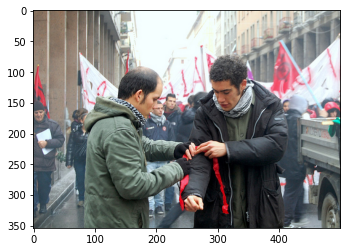

In [ ]:
img_id = list(encoding_test.keys())[15]

photo_enc = encoding_test[img_id].reshape((1,2048))
pred = predict(photo_enc,model)

print(pred)

path = images + img_id
img = plt.imread(path)
plt.imshow(img)
plt.show()

brown dog is running on the grass beside the fence


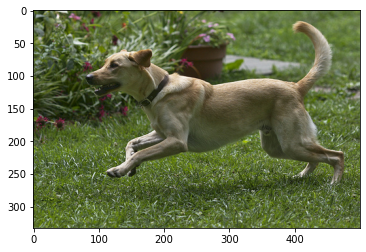

In [ ]:
img_id = list(encoding_test.keys())[5]

photo_enc = encoding_test[img_id].reshape((1,2048))
pred = predict(photo_enc,model)

print(pred)

path = images + img_id
img = plt.imread(path)
plt.imshow(img)
plt.show()

an american footballer in red and white football team is wearing uniforms


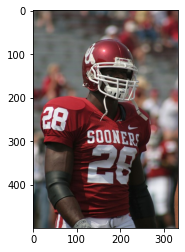

In [ ]:
img_id = list(encoding_test.keys())[4]

photo_enc = encoding_test[img_id].reshape((1,2048))
pred = predict(photo_enc,model)

print(pred)

path = images + img_id
img = plt.imread(path)
plt.imshow(img)
plt.show()